In [1]:
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv(r'F:\pk\01_Data_science\ASSIGNMENTS\05_Multiple_linear_regression\ToyotaCorolla.csv',encoding='latin1')

In [3]:
df.head(3)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0


In [4]:
df3=df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df3.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [5]:
'''import pandas_profiling as pp
EDA_report=pp.ProfileReport(df2)
EDA_report.to_file(output_file="ToyotaCorolla.html")'''

'import pandas_profiling as pp\nEDA_report=pp.ProfileReport(df2)\nEDA_report.to_file(output_file="ToyotaCorolla.html")'

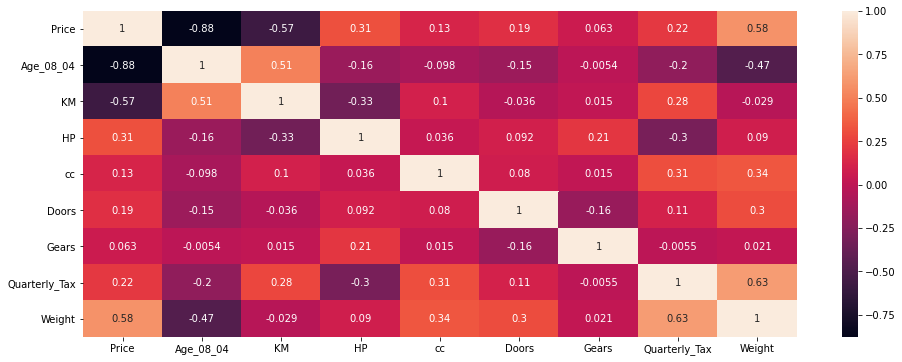

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=[16,6])
sns.heatmap(df3.corr(),annot=True)

In [7]:
df3.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [8]:
### conclusion 
### CC has max value of 16000 which seems an dataentry error 
### replacing value 16000 with 1600
df3["cc"].replace(16000,1600, inplace=True)

C:\Users\PawanK\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [9]:
df3.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1566.827994,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,187.182436,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,2000.000000,5.000000,6.000000,283.000000,1615.00000


In [10]:
from sklearn.model_selection import train_test_split
x=df3
train, test, = train_test_split(x,test_size= 0.2, random_state=0)

In [11]:
print(test.shape,train.shape)

(288, 9) (1148, 9)


In [12]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Quarterly_Tax+Weight+Doors',data=train).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sun, 20 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:18:46   Log-Likelihood:                -9861.7
No. Observations:                1148   AIC:                         1.974e+04
Df Residuals:                    1140   BIC:                         1.978e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4049.1113   1138.936     -3.555      0.000   -6283.756   -1814.466
Age_08_04      -121.3039      2.858    -42.447      0.000    -126.911    -115.697
KM               -0.0180      0.001    -12.501      0.000      -0.021      -0.015
HP               35.8213      3.242     11.050      0.000      29.461      42.182
cc               -2.0567      0.338     -6.085      0.000      -2.720      -1.394
Quarterly_Tax     7.6244      1.610      4.736      0.000       4.466      10.783
Weight           20.4747      1.200     17.059      0.000      18.120      22.830
Doors           -53.9344     42.754     -1.262      0.207    -137.819      29.950
==============================================================================
Omnibus:                      224.972   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2990.706
Skew:                          -0.489   Prob(JB):                         0.00
Kurtosis:                      10.847   Cond. No.                     2.32e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
### dropping column "Doors" as P value is >0.05 and standar error is high

In [15]:
train2=train.drop(columns=["Doors"])
train2.head(3)

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight
609,5751,67,174833,72,2000,5,185,1100
511,11900,51,53408,110,1600,5,85,1080
878,8500,60,61977,86,1300,5,69,1015


In [16]:
### Building new model withou Feature Doors
model2=smf.ols('Price~Age_08_04+KM+HP+cc+Quarterly_Tax+Weight',data=train2).fit()

In [17]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     1303.
Date:                Sun, 20 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:18:46   Log-Likelihood:                -9862.5
No. Observations:                1148   AIC:                         1.974e+04
Df Residuals:                    1141   BIC:                         1.977e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3892.5414   1132.446     -3.437      0.001   -6114.452   -1670.631
Age_08_04      -121.2397      2.858    -42.420      0.000    -126.847    -115.632
KM               -0.0181      0.001    -12.559      0.000      -0.021      -0.015
HP               35.6957      3.241     11.014      0.000      29.337      42.055
cc               -2.0329      0.338     -6.023      0.000      -2.695      -1.371
Quarterly_Tax     7.7244      1.608      4.802      0.000       4.569      10.880
Weight           20.0955      1.162     17.290      0.000      17.815      22.376
==============================================================================
Omnibus:                      212.916   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2683.408
Skew:                          -0.450   Prob(JB):                         0.00
Kurtosis:                      10.436   Cond. No.                     2.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
def cal_vif(x):
    #calculating VIF
    vif=pd.DataFrame()
    vif["Variable"]=x.columns
    vif["vif"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    
    return(vif)

In [20]:
x=train2[["Age_08_04","KM","HP","cc","Gears","Quarterly_Tax","Weight"]]
cal_vif(x)

,Variable,vif
0,Age_08_04,16.639557
1,KM,8.613237
2,HP,77.610317
3,cc,190.390962
4,Gears,401.145731
5,Quarterly_Tax,14.543426
6,Weight,517.367197


In [21]:
(model2.rsquared,model2.rsquared_adj)

(0.8726522626960248, 0.871982598871464)

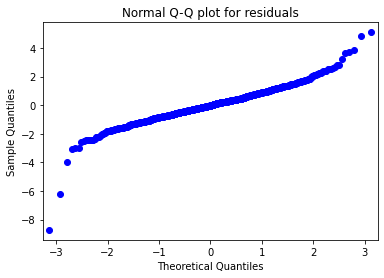

In [22]:
import statsmodels.api as sm
qqplot=sm.qqplot(model2.resid,fit=True)
plt.title("Normal Q-Q plot for residuals")
plt.show()

In [23]:
list(np.where(model.resid<-5000) or np.where(model.resid>5000))

[array([  3, 150, 896], dtype=int64)]

In [24]:
model_influence=model2.get_influence()
(c,_)=model_influence.cooks_distance

<ipython-input-25-0843a3442b17>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.round(c,3))


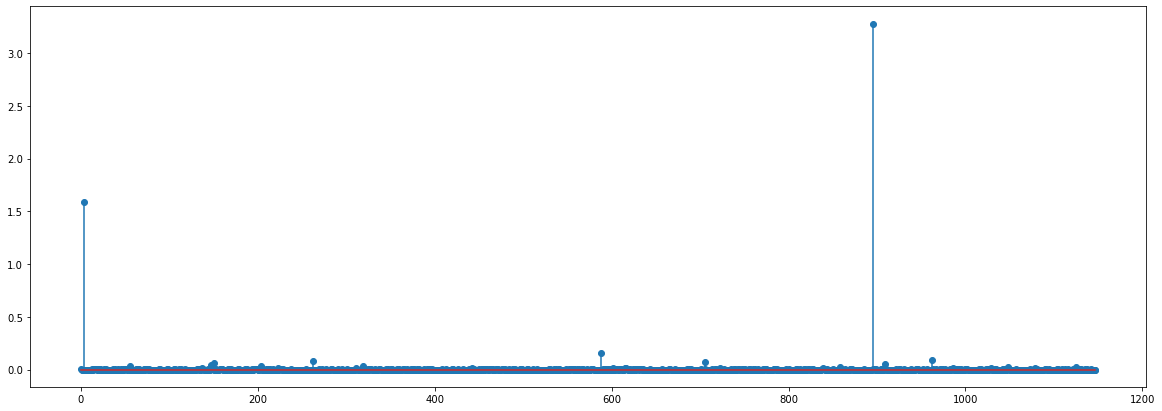

In [25]:
#plot the influenc value using stem plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.round(c,3))
plt.xlable={"Row index"}
plt.ylable=("Cooks distance")
plt.show()

In [26]:
np.arange(len(train2))

array([   0,    1,    2, ..., 1145, 1146, 1147])

In [27]:
cooks_distance=pd.DataFrame(c)

In [28]:
np.max(c)

3.279030092470657

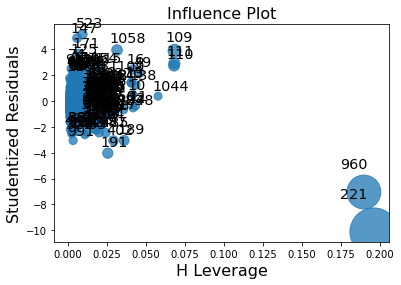

In [29]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model2)
plt.show()

In [30]:
k = train2.shape[1]
n = train2.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [31]:
leverage_cutoff

0.023519163763066203

In [32]:
train2[train2.index.isin([221,960])]

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight
960,9390,66,50806,86,1300,5,19,1480
221,12450,44,74172,110,1600,5,163,1615


In [33]:
test['predicted_price']=model2.predict(test)

<ipython-input-33-80ae5ddfdb28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_price']=model2.predict(test)


In [34]:
test

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,predicted_price
651,7950,68,115071,110,1600,3,5,85,1055,8314.780821
411,10950,52,99323,110,1600,3,5,85,1055,10539.199882
342,14950,42,29640,110,1600,3,5,85,1055,13010.848678
1298,7500,78,71186,110,1600,3,5,69,1050,7671.368738
483,9900,56,62751,110,1600,3,5,69,1050,10491.071400
...,...,...,...,...,...,...,...,...,...,...
1029,10450,58,30634,110,1600,5,5,85,1075,11454.960459
520,9400,54,50000,97,1400,3,5,69,1025,10404.135640
996,9950,67,42102,110,1600,5,5,85,1075,10156.563543
333,11750,40,32532,110,1600,3,5,69,1040,12776.043610


In [41]:
test.shape

(288, 10)

In [43]:
comparison=pd.DataFrame(test[["Price","predicted_price"]])

In [44]:
comparison

,Price,predicted_price
651,7950,8314.780821
411,10950,10539.199882
342,14950,13010.848678
1298,7500,7671.368738
483,9900,10491.071400
...,...,...
1029,10450,11454.960459
520,9400,10404.135640
996,9950,10156.563543
333,11750,12776.043610


In [45]:
comparison.reset_index().drop(['index'],axis=1)

,Price,predicted_price
0,7950,8314.780821
1,10950,10539.199882
2,14950,13010.848678
3,7500,7671.368738
4,9900,10491.071400
...,...,...
283,10450,11454.960459
284,9400,10404.135640
285,9950,10156.563543
286,11750,12776.043610


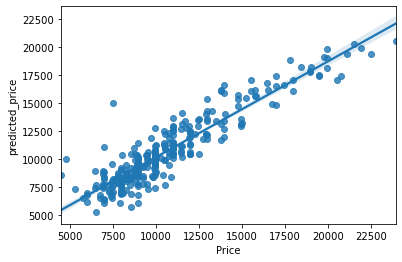

In [46]:
sns.regplot(x='Price', y='predicted_price', data = comparison)
plt.show()

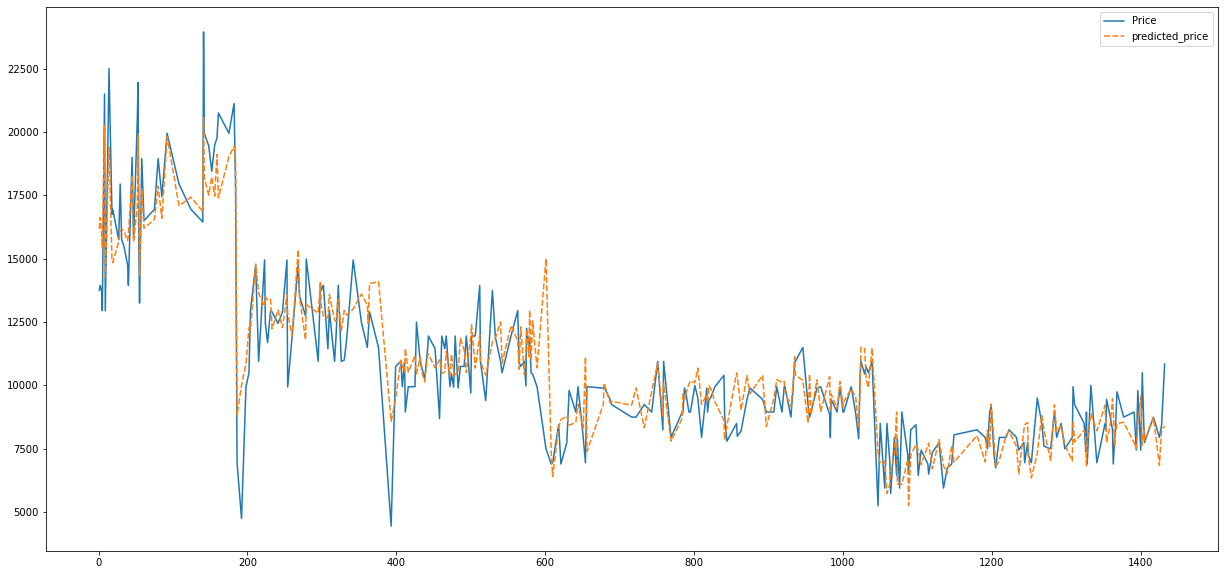

In [47]:
plt.subplots(figsize=(21,10))
sns.lineplot(data=comparison, hue=True)
plt.show()